<a href="https://colab.research.google.com/github/AIwannabe/Animals/blob/main/Is_it_a_cat_or_a_dog_or%3F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

In [3]:
# Load the CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Select only cats (label 3) and dogs (label 5)
cat_dog_train = np.where((y_train == 3) | (y_train == 5))[0]
cat_dog_test = np.where((y_test == 3) | (y_test == 5))[0]

X_train = X_train[cat_dog_train]
y_train = y_train[cat_dog_train]
X_test = X_test[cat_dog_test]
y_test = y_test[cat_dog_test]

# Convert labels: 3 -> 0 (cat), 5 -> 1 (dog)
y_train = np.where(y_train == 3, 0, 1)
y_test = np.where(y_test == 3, 0, 1)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [4]:
# Normalize the pixel values (0 to 1)
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

# Flatten the images from 32x32 pixels to a single 1D array (32*32*3 = 3072)
X_train = X_train.reshape(X_train.shape[0], 32 * 32 * 3)
X_test = X_test.reshape(X_test.shape[0], 32 * 32 * 3)


In [6]:
# Create the perceptron model
model = Sequential()

# Add a Dense layer with 1 perceptron (neuron) and sigmoid activation (for binary classification)
model.add(Dense(1, input_shape=(32 * 32 * 3,), activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [7]:
# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5251 - loss: 0.7259 - val_accuracy: 0.5860 - val_loss: 0.6798
Epoch 2/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5699 - loss: 0.6915 - val_accuracy: 0.5680 - val_loss: 0.6779
Epoch 3/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5848 - loss: 0.6765 - val_accuracy: 0.5945 - val_loss: 0.6682
Epoch 4/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5846 - loss: 0.6775 - val_accuracy: 0.5075 - val_loss: 0.7992
Epoch 5/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5749 - loss: 0.6847 - val_accuracy: 0.5880 - val_loss: 0.6781
Epoch 6/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5941 - loss: 0.6663 - val_accuracy: 0.6105 - val_loss: 0.6649
Epoch 7/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6030 - loss: 0.6670 - val_accuracy: 0.5905 - val_loss: 0.6812
Epoch 8/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6001 - loss: 0.6622 - val_accuracy: 0.

In [8]:
# Evaluate the model on the test data
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test accuracy: {accuracy * 100:.2f}%')


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5834 - loss: 0.6845
Test accuracy: 60.80%


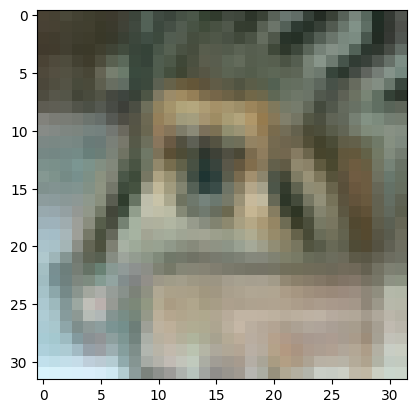

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step
It's a cat!


In [9]:
# Predict on a new image from the test set
import matplotlib.pyplot as plt

# Select a random test image
index = np.random.randint(0, X_test.shape[0])
image = X_test[index].reshape(32, 32, 3)

# Display the image
plt.imshow(image)
plt.show()

# Make a prediction (0 = cat, 1 = dog)
prediction = model.predict(X_test[index].reshape(1, 32 * 32 * 3))
if prediction > 0.5:
    print("It's a dog!")
else:
    print("It's a cat!")


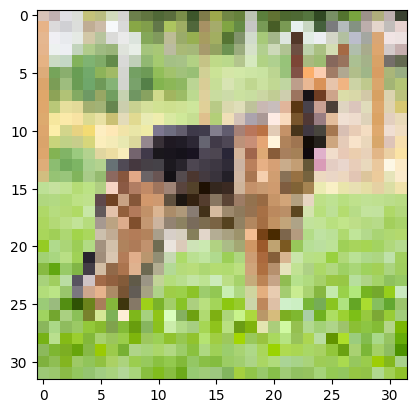

In [10]:
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# Load your image (replace 'your_image.jpg' with the filename you uploaded)
img_path = 'pet.webp'  # This is the name of the image you uploaded

# Load the image and resize it to 32x32 pixels
img = image.load_img(img_path, target_size=(32, 32))

# Display the image
plt.imshow(img)
plt.show()

# Convert the image to a numpy array and preprocess it
img_array = image.img_to_array(img)
img_array = img_array.astype('float32') / 255  # Normalize the image (0-1)
img_array = img_array.reshape(1, 32 * 32 * 3)  # Flatten the image to match input shape


In [11]:
# Use the trained model to predict if it's a cat or a dog
prediction = model.predict(img_array)

# Interpret the prediction
if prediction > 0.5:
    print("It's a dog!")
else:
    print("It's a cat!")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
It's a dog!


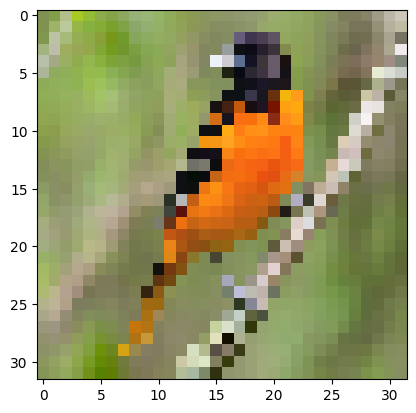

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
It's a cat!


In [12]:
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# Load your image (replace 'your_image.jpg' with the filename you uploaded)
img_path = 'pet2.jpg'  # This is the name of the image you uploaded

# Load the image and resize it to 32x32 pixels
img = image.load_img(img_path, target_size=(32, 32))

# Display the image
plt.imshow(img)
plt.show()

# Convert the image to a numpy array and preprocess it
img_array = image.img_to_array(img)
img_array = img_array.astype('float32') / 255  # Normalize the image (0-1)
img_array = img_array.reshape(1, 32 * 32 * 3)  # Flatten the image to match input shape

# Use the trained model to predict if it's a cat or a dog
prediction = model.predict(img_array)

# Interpret the prediction
if prediction > 0.5:
    print("It's a dog!")
else:
    print("It's a cat!")


In [14]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input, decode_predictions

# Load the pre-trained VGG16 model
model = VGG16(weights='imagenet')

# Load your image and preprocess it for VGG16
img = image.load_img('pet2.jpg', target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = preprocess_input(img_array)

# Make a prediction
predictions = model.predict(img_array)

# Decode the predictions
decoded_predictions = decode_predictions(predictions, top=3)
for i, (imagenet_id, label, score) in enumerate(decoded_predictions[0]):
    print(f"{i + 1}: {label} ({score:.2f})")


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 953ms/step
35363/35363 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
1: robin (0.64)
2: jacamar (0.18)
3: brambling (0.11)


In [15]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image
import numpy as np

# Load the pre-trained VGG16 model
model = VGG16(weights='imagenet')

# Load your new bird image and resize it to 224x224 pixels (required by VGG16)
img_path = 'pet3.jpg'  # Replace this with your new image file name
img = image.load_img(img_path, target_size=(224, 224))

# Convert the image to a numpy array
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)

# Preprocess the image for VGG16
img_array = preprocess_input(img_array)

# Make a prediction
predictions = model.predict(img_array)

# Decode and print the top 3 predictions
decoded_predictions = decode_predictions(predictions, top=3)
for i, (imagenet_id, label, score) in enumerate(decoded_predictions[0]):
    print(f"{i + 1}: {label} ({score:.2f})")


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1: toucan (1.00)
2: hornbill (0.00)
3: macaw (0.00)


In [16]:
# Your image processing and prediction code here
img_path = 'pet4.jpg'
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = preprocess_input(img_array)

predictions = model.predict(img_array)
decoded_predictions = decode_predictions(predictions, top=3)
for i, (imagenet_id, label, score) in enumerate(decoded_predictions[0]):
    print(f"{i + 1}: {label} ({score:.2f})")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1: hen (0.33)
2: great_grey_owl (0.23)
3: ruffed_grouse (0.10)


In [17]:
# Your image processing and prediction code here
img_path = 'pet5.jpg'
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = preprocess_input(img_array)

predictions = model.predict(img_array)
decoded_predictions = decode_predictions(predictions, top=3)
for i, (imagenet_id, label, score) in enumerate(decoded_predictions[0]):
    print(f"{i + 1}: {label} ({score:.2f})")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1: great_grey_owl (0.89)
2: ptarmigan (0.03)
3: prairie_chicken (0.01)


In [19]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions

# Load the pre-trained ResNet50 model
model = ResNet50(weights='imagenet')

# Use the same image loading and preprocessing steps
img_path = 'pet4.jpg'  # Your new owl image
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = preprocess_input(img_array)

# Make a prediction with ResNet50
predictions = model.predict(img_array)
decoded_predictions = decode_predictions(predictions, top=3)

# Display the predictions
for i, (imagenet_id, label, score) in enumerate(decoded_predictions[0]):
    print(f"{i + 1}: {label} ({score:.2f})")


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1: great_grey_owl (0.49)
2: hen (0.09)
3: ruffed_grouse (0.08)


In [20]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions

# Load the pre-trained ResNet50 model
model = ResNet50(weights='imagenet')

# Use the same image loading and preprocessing steps
img_path = 'pet5.jpg'  # Your new owl image
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = preprocess_input(img_array)

# Make a prediction with ResNet50
predictions = model.predict(img_array)
decoded_predictions = decode_predictions(predictions, top=3)

# Display the predictions
for i, (imagenet_id, label, score) in enumerate(decoded_predictions[0]):
    print(f"{i + 1}: {label} ({score:.2f})")


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1: great_grey_owl (0.99)
2: kite (0.01)
3: ptarmigan (0.00)
